| [**Lattice QCD I**](https://homepages.uni-regensburg.de/~lec17310/teaching/wise2122/lqft.html) | - | [**Christoph Lehner**](https://go.ur.de/lehner) |
|:-|--|-:|

# Chapter 14: Hadron Spectroscopy

In this section we discuss the spectrum of full QCD.  To this end we first need to identify the good quantum numbers.
Based on previous chapters, we need to consider space-time, flavor, and charge-conjugation symmetries.  On the lattice the Hamitlonian can be classified using the irreducible representations of the full octahedral group, as discussed in chapter 11.  In the continuum, however, the irreducible representations of $O(3)$ become relevant and are typically used to classify the states.

## Quantum numbers

We use the angular momentum Casimir $J$ of O(3), parity $P$, and charge conjugation $C$ to classify the different space-time and charge conjugation behavior.  We amend this discussion by also using the Casimir $I$ of the **isospin** flavor SU(2) symmetry in the up-down-quark sector.  One typically writes the states as $J^{PC}$.


## $N_f=2$ meson spectrum

We first discuss a theory with only up and down quarks with degenerate masses $m_u=m_d=m_l$ such that isospin becomes an exact symmetry.

The up and down quark fields live in an SU(2) doublet with $I=1/2$.  For mesonic states
we can combine two such fields to $I=0$ and $I=1$ irreducible representations.

For $I=0$, i.e., singlets in isospin, operators that create these states are of the form
$$
\begin{align}
O_{I=0} &= \frac1{\sqrt{2}}(\bar{u} \Gamma u + \bar{d} \Gamma d) \,,
\end{align}
$$
where $\Gamma$ can be a matrix in spin and space-time.  A two-point correlation function
between this operator and another one, say
$$
\begin{align}
O^\prime_{I=0} &= \frac1{\sqrt{2}}(\bar{u} \Gamma^\prime u + \bar{d} \Gamma^\prime d)
\end{align}
$$
can then be used to measure the $I=0$ spectrum.  The Wick contractions
$$
\begin{align}
C(t) &= \langle O^\prime_{I=0}(t) O_{I=0}(0) \rangle \\
&=-\langle \text{Tr}[ D^{-1}[U,m_l] \Gamma D^{-1}[U,m_l] \Gamma' ] \rangle_U
+2\langle \text{Tr}[ D^{-1}[U,m_l] \Gamma] \text{Tr}[ D^{-1}[U,m_l] \Gamma' ] \rangle_U \,.
\end{align}
$$
The first Wick contraction is called **quark-connected** or sometimes only **connected** and the
second is called **quark-disconnected** or just **disconnected** diagram.  For $I=0$ we note that we
have both types of contraction.  This typically leads to $I=0$ correlation functions to be particularly
noisy since the disconnected diagrams have constant noise for $t\to\infty$ but exponentially falling signal.
For the connected diagrams both the noise and the signal fall exponentially for $t\to \infty$, albeit at different rates.  The **Lepage** argument of chapter 3 explains this behavior.

For $I=1$, i.e., triplets in isospin, operators are
$$
\begin{align}
O_{I=1,I_3=+1} &= \bar{u} \Gamma d \,, \\
O_{I=1,I_3=0} &= \frac12(\bar{u} \Gamma u - \bar{d} \Gamma d) \,, \\
O_{I=1,I_3=-1} &= \bar{d} \Gamma u \,.
\end{align}
$$
Contractions between two such operators only have connected diagrams.

We next discuss the $J^{PC}$ quantum numbers and give the corresponding names and experimentally measured
masses

| I, $I_3$ | $J^{PC}$ | Name | Mass |
| --- | --- | --- |  --- |
| 1,0 | $0^{-+}$ | $\pi^0$ | 134.9766(6) MeV |
| 1,$\pm$ 1 | $0^{-}$ | $\pi^\pm$ | 139.57018(35) MeV |
| 0,0 | $0^{-+}$ | $\eta$ | 547.853(24) MeV |
| 1,$\pm$ 1 | $1^{-}$ | $\rho^-$ | 775.4(4) MeV (center), this state is a resonance |
| 1,0 | $1^{-+}$ | $\rho^0$ | 775.49(34) MeV (center), this state is a resonance |
| 0,0 | $1^{--}$ | $\omega$ | 782.65(12) MeV (center), this state is a narrow resonance |

Some of these states are marked as resonances, i.e., they are not themselves asymptotic states but can decay to lighter particles.  For physical masses, e.g., the $\rho^0$ can decay in two pions $\pi^+ \pi^-$ with relative momentum such that the combined operator has the quantum numbers of the $\rho$.

The lowest-lying two-pion state that the $\rho$ can decay into has approximately the energy of two non-interacting pions with smallest allowed momentum in the finite volume.  When the $\rho$ becomes a stable particle for the lattice Hamiltonian therefore depends both on the masses and on the volume.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def energy_lowest_moving_pion(mpi, L):
    return (mpi**2. + (2.0*np.pi/L)**2.)**0.5

# for mpiL = 4
print("For volumes with mpi L = 4")
for mpi in [140, 175, 200, 250]:
    print("mpi =",mpi, "MeV", "rho stable if mrho ~<", 2.*energy_lowest_moving_pion(mpi, 4 / mpi), "MeV")

For volumes with mpi L = 4
mpi = 140 MeV rho stable if mrho ~< 521.3868489532042 MeV
mpi = 175 MeV rho stable if mrho ~< 651.7335611915053 MeV
mpi = 200 MeV rho stable if mrho ~< 744.8383556474347 MeV
mpi = 250 MeV rho stable if mrho ~< 931.0479445592932 MeV


In order to study the $N_f=2$ meson spectrum from first principles lattice QCD, we generate a small ensemble using the HMC from chapter 13.  We use the following parameters:  Shamir DWF fermions ($b=1$, $c=0$)
and the Iwasaki gauge action ($c_1=-0.331$) with
$$
\begin{align}
V &= 16^3 \times 32 \,, \\
L_s &= 16 \,, \\
m_u &= m_d \in \{0.01, 0.02, 0.04\} \,,\\
M_5 &= 1.8 \,, \\
\beta &= 2.13 \,, \\
\tau &= 0.6 \,,
\end{align}
$$
where $\tau$ is the MD trajectory length.  Let us first study the convergence of the plaquette.

0.11694571822930958
0.20272987289475408


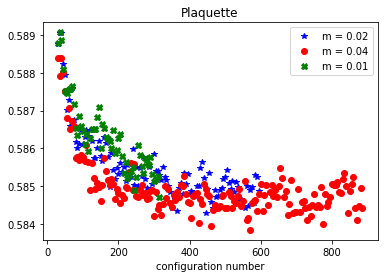

In [134]:
plaquette_0p01_conf = [int(a.split(" ")[0]) for a in filter(lambda x: x!="",open("plaquette_0p01.dat").read().split("\n"))]
plaquette_0p01 = [float(a.split(" ")[1]) for a in filter(lambda x: x!="",open("plaquette_0p01.dat").read().split("\n"))]

plaquette_0p02_conf = [int(a.split(" ")[0]) for a in filter(lambda x: x!="",open("plaquette_0p02.dat").read().split("\n"))]
plaquette_0p02 = [float(a.split(" ")[1]) for a in filter(lambda x: x!="",open("plaquette_0p02.dat").read().split("\n"))]

plaquette_0p04_conf = [int(a.split(" ")[0]) for a in filter(lambda x: x!="",open("plaquette_0p04.dat").read().split("\n"))]
plaquette_0p04 = [float(a.split(" ")[1]) for a in filter(lambda x: x!="",open("plaquette_0p04.dat").read().split("\n"))]

fig, ax = plt.subplots()

#plt.xlim()

def ac(x, dt):
    m = sum(x) / len(x)
    var = sum([ (x[i] - m)**2. for i in range(len(x)-dt) ])
    cov = sum([ (x[i] - m)*(x[i+dt] - m) for i in range(len(x)-dt) ])
    return cov / var

print(ac(plaquette_0p04[60:],2))
print(ac(plaquette_0p02[60:],2))

plt.title("Plaquette")
plt.xlabel("configuration number")
ax.plot(plaquette_0p02_conf[6:],plaquette_0p02[6:],marker="*",ls="",color="blue",label="m = 0.02")
ax.plot(plaquette_0p04_conf[6:],plaquette_0p04[6:],marker="o",ls="",color="red",label="m = 0.04")
ax.plot(plaquette_0p01_conf[6:],plaquette_0p01[6:],marker="X",ls="",color="green",label="m = 0.01")
plt.legend()

plt.show()

We note that currently the $m=0.01$ ensemble is not yet thermalized.  We therefore need to generate more configurations before obtaining reliable results for this mass.

For the other ensembles, one may perform an analysis for configuration numbers beyond 400.  The code to compute the mesonic correlation functions is given below.  We note, that $\Gamma=\gamma_5$ has the correct quantum numbers, however, couples strongly to the excited states.  We therefore combine the $\Gamma$ with a **covariant Gaussian smearing** operator $S_\Delta$,
$$
\begin{align}
\Gamma^\prime = \gamma_5 S_\Delta \,,
\end{align}
$$
where
$$
\begin{align}
\Delta \psi(x) &= \sum_{\mu \in \{0,1,2\}} (U_\mu(x) \psi(x+\hat{\mu}) + U_\mu^\dagger(x-\hat{\mu}) \psi(x-\hat{\mu}) - 2 \psi(x)) \,, \\
S_\Delta(\sigma,n) &= \left( 1 + \frac{\sigma^2}{4 n} \Delta \right)^n \,.
\end{align}
$$
One finds in practice that this leads to a suppressed coupling to the excited state relative to the ground state.
The code to perform this contraction is shown below.

Another very useful method is the use of random insertions of the identity matrix as an outer product of two vectors.
Consider a vector $\eta_x$ with elements in the complex numbers satisfying
$$
\begin{align}
\langle \eta_x \eta_y^* \rangle &= \delta_{xy} \,,
\end{align}
$$
where $\langle \cdot \rangle$ denotes the statistical average.
We can then write this as
$$
\begin{align}
\langle \eta \eta^\dagger \rangle &= \mathbb{1}
\end{align}
$$
such that
$$
\begin{align}
C(t) &= -\langle \text{Tr}[ D^{-1}[U,m_l] \Gamma D^{-1}[U,m_l] \Gamma' ] \rangle_U \\
&= -\langle \text{Tr}[ D^{-1}[U,m_l] \eta \eta^\dagger \Gamma D^{-1}[U,m_l] \Gamma' ] \rangle_U \\
&= -\langle \text{Tr}[ D^{-1}[U,m_l] \eta  \Gamma \eta^\dagger D^{-1}[U,m_l] \Gamma' ] \rangle_U \\
&= -\langle \text{Tr}[ D^{-1}[U,m_l] \eta  \Gamma \eta^\dagger \gamma_5 (D^{-1}[U,m_l])^\dagger \gamma_5 \Gamma' ]  \\
&= -\langle \text{Tr}[ \phi  \Gamma \gamma_5 \phi^\dagger \gamma_5 \Gamma' ] \rangle_U
\end{align}
$$
with
$$
\begin{align}
\phi = D^{-1}[U,m_l] \eta \,.
\end{align}
$$
In this way we can factor the correlation function and statistically generate a full volume average.  This comes at the cost of introducing additional noise due to the $\eta$ fluctuations and depending on if the gauge noise or this $\eta$ noise is larger, it may be a better statistical estimator.

For the mesons to be computed in this chapter, this method performs well and for concreteness, we use $\eta_x \in [1,-1]$, where both are drawn with equal probability.  We call this a $Z_2$ source.  The corresponding GPT code is given below.

In [102]:
import gpt as g

g.default.set_verbose("io", False)
g.default.set_verbose("cg_convergence", False)
g.default.set_verbose("cg", True)

def mesons(mass, config):
    mass_fmt = str(mass).replace(".","p")
    U = g.load(f"/glurch/home/lec17310/configurations/DWF/IWASAKI/2f/16c32/ls16/mu{mass_fmt}/ckpoint_lat.{config}")
    D_m = g.qcd.fermion.mobius(U, M5=1.8, mass=mass, Ls=16, b=1., c=0.,
                               boundary_phases=[1,1,1,-1])

    grid = U[0].grid

    inv = g.algorithms.inverter
    pc = g.qcd.fermion.preconditioner
    cg = inv.cg({"eps": 1e-7, "maxiter": 1000})
    invD = D_m.propagator(inv.preconditioned(pc.eo1_ne(), cg))

    src = g.mspincolor(grid)
    rng = g.random(str(mass) + "-" + str(config))
    t0 = rng.uniform_int(min = 0, max = grid.gdimensions[3] - 1)
    g.create.wall.z2(src, t0, rng)

    g.message("smear start")
    smear = g.create.smear.gauss(U, sigma=3.0, steps=30, dimensions=[0, 1, 2])

    src = g(smear * src)
    g.message("smear end")

    prop_xy = g(invD * src)
    prop_yx = g(g.gamma[5] * g.adj(prop_xy) * g.gamma[5])

    pion_correlator = np.array(g.slice(g.trace(prop_xy * g.gamma[5] * prop_yx * g.gamma[5]),3))
    pion_correlator = np.roll(pion_correlator, -t0)

    rho_correlator = sum([np.array(g.slice(g.trace(prop_xy * g.gamma[i] * prop_yx * g.gamma[i]),3)) for i in range(3)])
    rho_correlator = np.roll(rho_correlator, -t0)

    return {
        "pion" : pion_correlator,
        "rho" : rho_correlator
    }

#mesons_0p04 = {}
#for c in range(100,260,10):
#    g.message(c)
#    mesons_0p04[c] = mesons(0.04, c)

In [4]:
array = np.array
# only use eval for trusted files!
mesons_0p04=eval(open("mesons_0p04.json").read())
mesons_0p04={x: mesons_0p04[x] for x in mesons_0p04 if x >= 400} # keep only thermalized

mesons_0p02=eval(open("mesons_0p02.json").read())
mesons_0p02={x: mesons_0p02[x] for x in mesons_0p02 if x >= 400}

print(mesons_0p02.keys())

dict_keys([400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590])


Let us now compute the pion and $\rho$ energies for different quark masses.

45


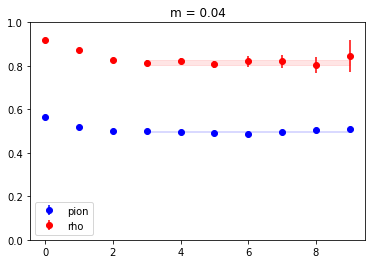

(0.4980639522900839, 0.0026241899215518967) (0.8165568756531584, 0.011563011895523894)
20


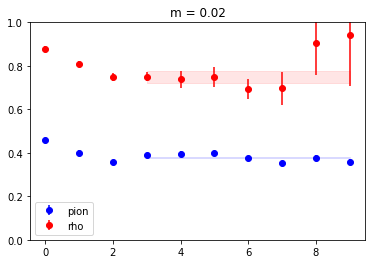

(0.3791607121124395, 0.0029252620443503334) (0.7470131943371477, 0.027296044975130426)


In [104]:
def jackknife_variance_estimator(f, x):
    N = len(x)
    X = sum(x) / N
    mean = f(X)
    return sum([(f((N*X - x[j])/(N-1)) - mean)**2 for j in range(N)])*(N-1)/N

def bin_data(res, bin_size):
    assert len(res) % bin_size == 0
    n = len(res) // bin_size
    return [ sum(res[bin_size*i:bin_size*(i+1)])/bin_size for i in range(n) ]

# C(t) = A*(exp(-t E) + exp(-(T-t)*E))
def emp_fold(C):
    Cf = [(C[t] + C[(32 - t) % 32])/2. for t in range(17)]
    E = [np.arccosh((Cf[t].real + Cf[t+2].real) / 2 / Cf[t+1].real) for t in range(2,12)]
    return np.array(E)

def plateau(C, t0, t1, E, emp):
    C = emp(C)
    return np.array([sum([C[t]/E[t] for t in range(t0,t1)]) / sum([1.0/E[t] for t in range(t0,t1)])])

def mesons(data, nbin, tag):
    corrs = bin_data(np.array([data[x]["pion"] for x in data]),nbin)
    print(len(corrs))
    E_pi = emp_fold(np.mean(corrs,axis=0))
    E_pi_err = jackknife_variance_estimator(emp_fold, corrs)**0.5
    
    t0 = 4
    t1 = 10
    E_pi_plateau = plateau(np.mean(corrs,axis=0), t0, t1, E_pi_err, emp_fold)
    E_pi_plateau_err = jackknife_variance_estimator(lambda c: plateau(c, t0, t1, E_pi_err, emp_fold), corrs)**0.5

    corrs = bin_data(np.array([data[x]["rho"] for x in data]),nbin)
    E_rho = emp_fold(np.mean(corrs,axis=0))
    E_rho_err = jackknife_variance_estimator(emp_fold, corrs)**0.5

    t0 = 3
    t1 = 10
    E_rho_plateau = plateau(np.mean(corrs,axis=0), t0, t1, E_rho_err, emp_fold)
    E_rho_plateau_err = jackknife_variance_estimator(lambda c: plateau(c, t0, t1, E_rho_err, emp_fold), corrs)**0.5

    fig, ax = plt.subplots()

    plt.ylim(0.0,1.0)
    plt.title(tag)

    X=len(E_pi)
    ax.errorbar(np.arange(X),E_pi,E_pi_err,marker="o",ls="",color="blue",label="pion")
    ax.errorbar(np.arange(X),E_rho,E_rho_err,marker="o",ls="",color="red",label="rho")
    ax.fill_between(np.arange(t0,t1),[E_pi_plateau[0]-E_pi_plateau_err[0]]*(t1-t0),
                    [E_pi_plateau[0]+E_pi_plateau_err[0]]*(t1-t0),alpha=0.1,color="blue")
    ax.fill_between(np.arange(t0,t1),[E_rho_plateau[0]-E_rho_plateau_err[0]]*(t1-t0),
                    [E_rho_plateau[0]+E_rho_plateau_err[0]]*(t1-t0),alpha=0.1,color="red")
    plt.legend()

    plt.show()

    return ((E_pi_plateau[0], E_pi_plateau_err[0]),(E_rho_plateau[0], E_rho_plateau_err[0]))

mpi_0p04, mrho_0p04 = mesons(mesons_0p04, 1, "m = 0.04")
print(mpi_0p04, mrho_0p04)

mpi_0p02, mrho_0p02 = mesons(mesons_0p02, 1, "m = 0.02")

print(mpi_0p02, mrho_0p02)

## $N_f=2$ baryon spectrum

Next, we consider baryons, i.e., states made of three quarks with $N_f=2$.  The most prominent example is the $I=1/2$ and $J^{P}=(1/2)^{+}$ which is the proton/neutron.  Note that for degenerate up and down quarks the proton and neutron have the same mass.

One can show that a baryonic operator transforming in the $J=1/2$, $I=1/2$ representation is given by
$$
\begin{align}
O_N &= \varepsilon_{abc} u_a (u_b^T C \gamma_5 d_c) \,,
\end{align}
$$
where $C$ is the charge conjugation matrix of chapter 11 and $\varepsilon_{abc}$ is the total antisymmetric tensor of rank 3.

Since we want a state that is a parity eigenstate with $P=1$, we also consider the parity transformation (see chapter 11) of this operator and find
$$
\begin{align}
O_N^P(\vec{x},t) &= \gamma_4 O_N(-\vec{x},t) \,.
\end{align}
$$
If we also project to zero momentum by summing the operators over all spatial positions, we find that a parity
definite operator is given by
$$
\begin{align}
O_N^+(t) = \sum_{\vec{x}} P_+ O_N(\vec{x},t)
\end{align}
$$
with
$$
\begin{align}
P_+ &= \frac12 (1 + \gamma_4) \,.
\end{align}
$$

The two-point correlator for fixed gauge field is then given by
$$
\begin{align}
C(t) &= \langle O_N^+(t) (O_N^+(0))^\dagger \rangle_\psi \\
&=\varepsilon_{abc} \varepsilon_{a'b'c'} (Cg5)_{\alpha'\beta'} (Cg5)_{\alpha\beta} (P_+)_{\gamma\gamma'} 
 \langle d \bar d \rangle_{\beta'\beta;b'b} ( \langle u \bar u \rangle_{\alpha'\alpha;a'a} \langle u \bar u \rangle_{\gamma'\gamma;c'c} - \langle u \bar u \rangle_{\alpha'\gamma;a'c} \langle u \bar u \rangle_{\gamma'\alpha;c'a}) \,,
\end{align}
$$
where the space-time argument of all propagators is $\vec{x},t;0$ and a sum over $\vec{x}$ is implied.

Note that there are also baryons with negative parity and with higher $J$ and $I$ quantum numbers, e.g.,

| I| $J^{P}$ | Name | Mass |
| --- | --- | --- |  --- |
| 1/2 | $1/2^{+}$ | proton | 938.2720813(58) MeV |
| 1/2 | $1/2^{+}$ | neutron | 939.5654133(58) MeV |
| 1/2 | $1/2^{-}$ | N(1535) | $\approx 1535$ MeV |
| 3/2 | $3/2^{+}$ | $\Delta$ | 1232(2) MeV |

We conclude this chapter by discussing code to compute the baryon correlation function.

In [135]:
def proton(Q1, Q2):
    #
    # eps(a,b,c) eps(a',b',c') (Cg5)_alpha'beta' (Cg5)_alphabeta Pp_gammagamma' D^-1_beta'beta_b'b
    # (U^-1_alpha'alpha_a'a U^-1_gamma'gamma_c'c - U^-1_alpha'gamma_a'c U^-1_gamma'alpha_c'a)
    #
    # =
    #
    # eps(a,b,c) eps(a',b',c') (Cg5)_alpha'beta' (Cg5)_alphabeta Pp_gammagamma' D^-1_beta'beta_b'b
    # U^-1_alpha'alpha_a'a U^-1_gamma'gamma_c'c
    # -
    # eps(a,b,c) eps(a',b',c') (Cg5)_alpha'beta' (Cg5)_alphabeta Pp_gammagamma' D^-1_beta'beta_b'b
    # U^-1_alpha'gamma_a'c U^-1_gamma'alpha_c'a
    #
    # =
    #
    # eps(c,a,b) eps(c',a',b') (U^-1 C g5)_alpha'beta_a'a (C g5 D^-1)^Tspin_betaalpha'_b'b  Tr_S[Pp U^-1_c'c]
    # +
    # eps(a,b,c) eps(a',b',c')  Pp_gammagamma' 
    #  (U^-1 Cg5)_gamma'beta_c'c (Cg5 D^-1)^Tspin_betaalpha'_b'b U^-1_alpha'gamma_a'a
    #
    # =
    #
    # Tr_S[diquark(U^-1 C g5, C g5 D^-1)_{cc'}] Tr_S[Pp U^-1_c'c]
    # +
    # diquark(U^-1 C g5, C g5 D^-1)_{gamma'alpha', aa'} Pp_gammagamma' 
    #   U^-1_alpha'gamma_a'a
    #
    # =
    #
    # Tr_C[Tr_S[diquark(U^-1 C g5, C g5 D^-1)] Tr_S[U^-1 Pp]]
    # +
    # Tr[ U^-1 Pp diquark(U^-1 C g5, C g5 D^-1) ]
    #   
    #
    # with
    #
    # diquark(Q1,Q2)_{gammagamma', cc'} = eps(c,a,b) eps(c',a',b') (Q1)_gammabeta_a'a (Q2)^Tspin_betagamma'_b'b 
    #
    C = 1j*g.gamma[1].tensor()*g.gamma[3].tensor()
    Gamma = C*g.gamma[5].tensor()
     
    Pp = (g.gamma["I"].tensor() + g.gamma[3].tensor())*0.5
    
    dq = g.qcd.baryon.diquark(g(Q1*Gamma),g(Gamma*Q2))
    q1p = g(Q1 * Pp)
    
    return g(
        g.color_trace(g.spin_trace(dq) * g.spin_trace(q1p) + g.spin_trace(dq*q1p))
    )

rng = g.random("d")
U = rng.cnormal(g.mspincolor(grid))
D = rng.cnormal(g.mspincolor(grid))
proton1 = proton(U, D)

V = rng.element(g.mcolor(grid))

# test gauge invariance
proton2 = proton(g(V * U * g.adj(V)),g(V * D * g.adj(V)))

print(g.norm2(proton1 - proton2)/g.norm2(proton1))

GPT :   61722.610912 s : Initializing gpt.random(d,vectorized_ranlux24_389_64) took 0.000323057 s
4.073750915814535e-31


98


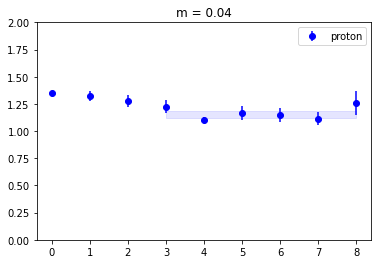

40


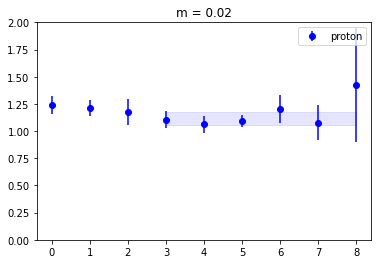

(1.1121024147048486, 0.05917619688972632)


In [188]:
array = np.array
# only use eval for trusted files!
proton_0p04=eval(open("proton_0p04.json").read())
proton_0p04={x: proton_0p04[x] for x in proton_0p04 if x >= 400} # keep only thermalized

proton_0p02=eval(open("proton_0p02.json").read())
proton_0p02={x: proton_0p02[x] for x in proton_0p02 if x >= 400} # keep only thermalized


def emp_log(Cf):
    E = [np.log(Cf[t].real / Cf[t+1].real) for t in range(2,11)]
    return np.array(E)

def proton(data, nbin, tag, t0):
    corrs = bin_data(np.array([data[x]["proton"] for x in data]),nbin)
    print(len(corrs))
    E_p = emp_log(np.mean(corrs,axis=0))
    E_p_err = jackknife_variance_estimator(emp_log, corrs)**0.5
    
    #print(np.mean(corrs,axis=0))
    #img = np.mean(corrs,axis=0).imag
    #img_err = jackknife_variance_estimator(lambda x: x.imag, corrs)**0.5
    #for i in range(len(img)):
    #    print(i,img[i]/img_err[i])
    
    t1 = 9
    E_p_plateau = plateau(np.mean(corrs,axis=0), t0, t1, E_p_err, emp_log)
    E_p_plateau_err = jackknife_variance_estimator(lambda c: plateau(c, t0, t1, E_p_err, emp_log), corrs)**0.5

    fig, ax = plt.subplots()

    plt.ylim(0.0,2.0)
    plt.title(tag)

    X=len(E_p)
    ax.errorbar(np.arange(X),E_p,E_p_err,marker="o",ls="",color="blue",label="proton")
    ax.fill_between(np.arange(t0,t1),[E_p_plateau[0]-E_p_plateau_err[0]]*(t1-t0),
                    [E_p_plateau[0]+E_p_plateau_err[0]]*(t1-t0),alpha=0.1,color="blue")
    
    plt.legend()

    plt.show()
    
    return (E_p_plateau[0], E_p_plateau_err[0])



mproton_0p04 = proton(proton_0p04,1,"m = 0.04", 3)

mproton_0p02 = proton(proton_0p02,1,"m = 0.02", 3)
print(mproton_0p02)

Finally, let us consider the pion, rho, and proton masses for the ensembles generated so far.

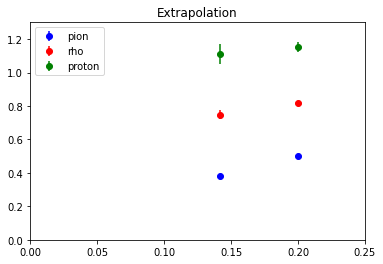

In [183]:
sqrt_quark_masses = [0.02**0.5, 0.04**0.5]
rho_masses = [mrho_0p02[0], mrho_0p04[0]]
rho_masses_err = [mrho_0p02[1], mrho_0p04[1]]
pi_masses = [mpi_0p02[0], mpi_0p04[0]]
pi_masses_err = [mpi_0p02[1], mpi_0p04[1]]
proton_masses = [mproton_0p02[0], mproton_0p04[0]]
proton_masses_err = [mproton_0p02[1], mproton_0p04[1]]

def extrapolation():
 
    fig, ax = plt.subplots()

    plt.ylim(0.0,1.3)
    plt.xlim(0,0.25)
    
    plt.title("Extrapolation")

    ax.errorbar(sqrt_quark_masses,pi_masses,pi_masses_err,marker="o",ls="",color="blue",label="pion")
    ax.errorbar(sqrt_quark_masses,rho_masses,rho_masses_err,marker="o",ls="",color="red",label="rho")
    ax.errorbar(sqrt_quark_masses,proton_masses,proton_masses_err,marker="o",ls="",color="green",label="proton")
    plt.legend()

    plt.show()

extrapolation()

To the degree that the $\rho$ is a stable particle for the given mass configuration, one could then use, e.g., the ratio of $m_\rho/m_\pi$ to tune the physical light quark mass $m_l$ and use $m_\pi / a = m_\pi^{\rm experiment}$ to define the lattice spacing.  The proton mass at the corresponding mass point is then a prediction of the theory.


## $N_f=2+1$

By introducing a strange quark, new mesonic and baryonic states appear.  Particularly important are the
pseudoscalar mesons combining up/down with a strange quark (**kaons**) with a mass of approximately 500 MeV and the vector meson made of a strange quark-anti-quark pair (${\bf\phi}$).  The latter is a resonance albeit with a narrow width.

For the baryons a particularly important state is the $J=3/2$, $P=1$ state ${\bf\Omega^-}$ made of three strange quarks.
Its mass is known experimentally to very high precision ($1672.45(29)$ MeV), is stable and receives small isospin-breaking and QED corrections.  In calculations where a strange quark has been introduced, it is often used to set the lattice spacing.

## $N_f=2+1+1+1$

The physics of charm and bottom quarks will be discussed briefly in the next chapter.